<a href="https://colab.research.google.com/github/Maxelweb/vision-cognitive-services-labs/blob/master/Lab1_LinearRegression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1 : Linear regression with NumPy**

In this exercise, you will implement a linear regressor for the house pricing problem. You will predict house prices training your predictor on previous collected data. 

The idea behind (multiple) linear regression is to extract a linear relation between features and target data which can be represented by the following equation:
\begin{equation}
y(x_1, x_2, \dots, x_n) = w_0 + w_1x_1 + w_2x_2+\dots + w_n x_n = w_0 + \sum_{i=1}^m w_i\cdot x_i.~~~~~~~~~~~~~~~~~~~(1)
\end{equation}

In [2]:
# Import packages for data loading/manipulation
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
# Additional packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d


**Dataset description**

The Boston Housing dataset contains prices of various houses in Boston depending on several parameters. The dataset contains 506 samples and 13 features. Your task is to fit a linear model and predict prices using unseen data.

In [3]:
# Load dataset
dataset = load_boston()
print(dataset.data.shape)
print(dataset.keys())
print(dataset.feature_names)
print(dataset.DESCR)

(506, 13)
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

**Data analysis**

Before training a linear regressor, we will visualize the relationship between each feature and target data using histogram and scatter plots from the matplotlib library.
Let’s first plot the distribution of the target variable.

In [ ]:
X = np.array(dataset.data) # Features
y = np.array(dataset.target) # Prices

print("Dataset shape -> {}, target variable shape -> {}".format(X.shape,y.shape))

Dataset shape -> (506, 13), target variable shape -> (506,)


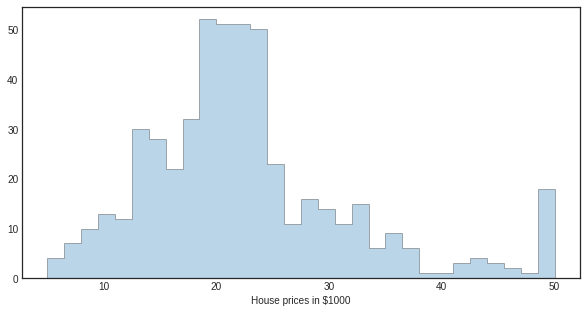

In [ ]:
plt.figure(figsize=(10, 5))
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=30, ec="k")
plt.hist(y, **kwargs)  
plt.xlabel("House prices in $1000")
plt.show()
plt.show()

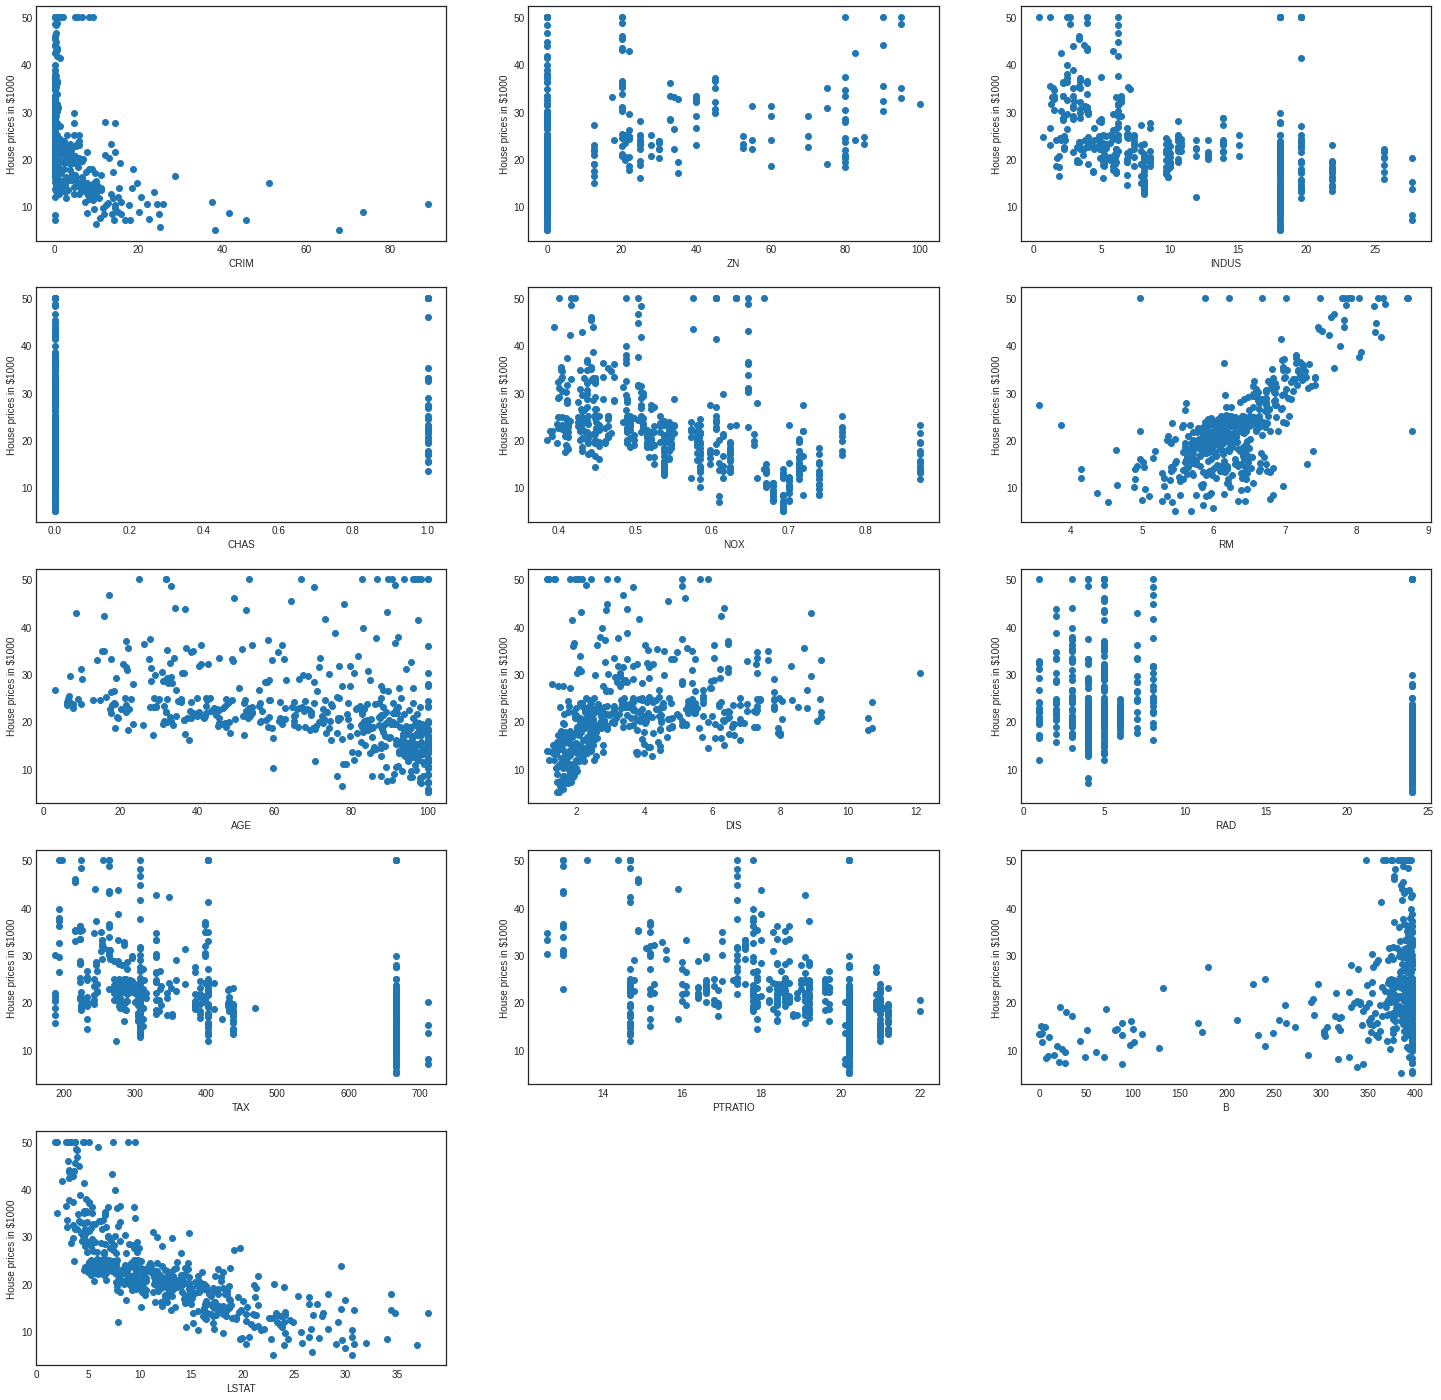

In [ ]:
features = dataset.feature_names
plt.figure(figsize=(25, 25))  

for i, feature in enumerate(features):
  plt.subplot(5, 3 , i+1)
  # Select i-th feature
  x = X[:, i]
  # Scatter plot
  plt.scatter(x, y, marker='o')
  plt.xlabel(feature)
  plt.ylabel('House prices in $1000')


**Simple linear regression**

In simple linear regression, a single independent variable is used to predict the value of a dependent variable. Since it is hard to *visualize* our model with multiple features, we will first predict the house prices with just one variable and then move to the regression with all the features.
For example, we can select the ‘LSTAT’ feature which shows a negative correlation with the house prices.

In [ ]:
# Select LSTAT feature from X
X_lstat = X[:, -1].reshape(-1,1) 
y_price = y.reshape(-1,1)

print(X_lstat.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(\
                X_lstat, y_price, test_size=0.2, random_state=5)

The objective of linear regression is to minimize the cost function
\begin{equation}
J(w) = \frac{1}{2m}\sum_{i = 1}^{m} (h_w(x^{(i)})-y^{(i)})^2 ~~~~~~~~~~~~~~~~~~~(2)
\end{equation}
where the hypothesis $h_w(x)$ is given by the linear model 
\begin{equation}
h_w(x) = w^Tx = w_0+w_1x_1. ~~~~~~~~~~~~~~~~~~~~~~~~~~~~(3)
\end{equation}
In each iteration, we perform the following update:
\begin{equation}
w_j := w_j-\alpha\frac{1}{m}(h_w(x^{(i)})-y^{(i)})x_j^{(i)} ~~~~~~~~~~~~~~~~~~~(4)
\end{equation}

# Ex.1

Complete the following code to compute the cost function as reported in Equation (2).

In [ ]:
# Loss function - Sum of Squared Errors (SSE)
def compute_cost(X, y, params):
    # Implement your code here
    pass

# Gradient descent algorithm
Repeat until convergence (or maximum number of iterations) {
  1. Calculate gradient 
  2. Multiply by learning rate
  3. Subtract from weights

}

# Ex.2

Implement gradient descent algorithm as reported in Equation (4).

In [ ]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    """
      Output variables size
      [J_history] = n_iters x 1
      [optimal_params] = (n_features+1) x 1
      [params_history] = (n_feature+1) x (n_iters+1)
      
    """
    # Implement your code here
    pass

In [ ]:
# Add intercept term to X_train
print(X_train.shape)
X_train = np.hstack((np.ones((X_train.shape[0],1)), X_train))
print(X_train.shape)
print("Total samples in X_train: {}".format(X_train.shape[0]))

(404, 1)
(404, 2)
Total samples in X_train: 404


In [ ]:
# Data initialization
n_features = np.size(X_train, 1) # n_features also contains the bias term
# Initialize parameters
params = np.zeros((n_features, 1))
print("Number of features: {}".format(n_features))

Number of features: 2


Initial cost is:  299.38922029702974 

Optimal parameters are: 
 [[33.92453385]
 [-0.92205139]] 

Final cost is:  [19.33735787]


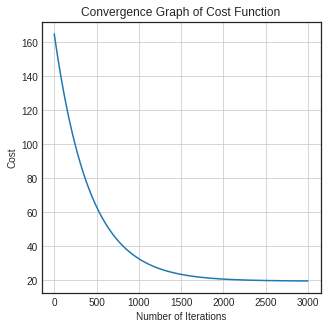

In [ ]:
n_iters = 3000
learning_rate = 0.005
initial_cost = compute_cost(X_train, y_train, params)
print("Initial cost is: ", initial_cost, "\n")

# Apply gradient descent algorithm
(J_history, optimal_params, params_history) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)
print("Optimal parameters are: \n", optimal_params, "\n")
print("Final cost is: ", J_history[-1])

# Plot J history
plt.figure(figsize=(5, 5))  
plt.plot(range(len(J_history)), J_history)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()


Plotting the model fitted line on the output variable.


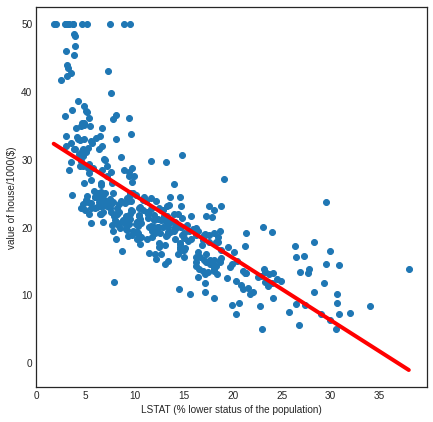

In [ ]:
plt.figure(figsize=(7, 7))  
prediction_space = np.linspace(min(X_lstat), max(X_lstat)).reshape(-1,1) 
plt.scatter(X_train[:,1], y_train)
plt.plot(prediction_space, optimal_params[0] + prediction_space * optimal_params[1], color = 'red', linewidth = 4)
plt.ylabel('value of house/1000($)')
plt.xlabel('LSTAT (% lower status of the population)')
plt.show()

# Visualizing $J(w)$ (Optional)

To better understand the cost function, you can plot the cost over a 2-dimensional grid of $w_0$ and $w_1$ values.

Text(0.5, 0.92, 'J(w0,w1)')

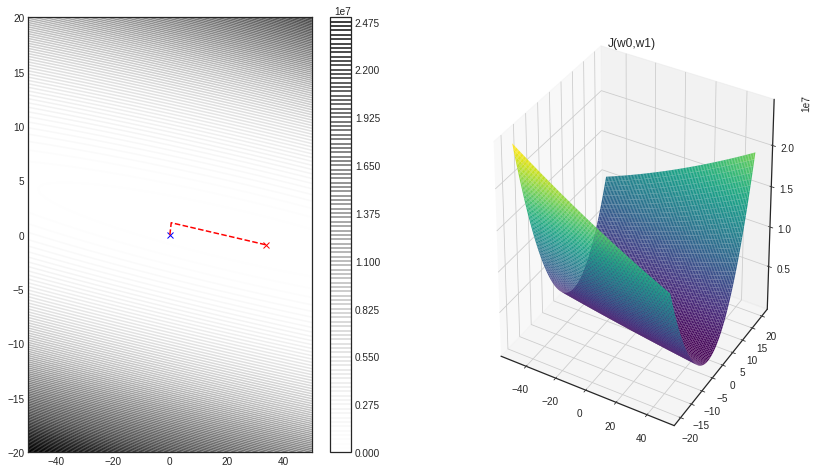

In [ ]:
fig = plt.figure(figsize=(14,8)) # create the canvas for plotting
ax1 = fig.add_subplot(1,2,1)

# Create grid of w0/w1 values
w0_values = np.linspace(-50, 50, 100);
w1_values = np.linspace(-20, 20, 100);
W0, W1 = np.meshgrid(w0_values, w1_values)
J = np.zeros((w0_values.shape[0] * w1_values.shape[0]))

# Compute cost function for each point in the grid
for i, (w0,w1) in enumerate(zip(np.ravel(W0), np.ravel(W1))):
  params = [w0, w1]
  J[i] = compute_cost(X_train, y_train, params)

J = J.reshape(w0_values.shape[0], w1_values.shape[0])

# Plot cost function
plt.contour(W0, W1, J, 100)
plt.colorbar()

# Plot params history
plt.plot(params_history[0, 0], params_history[1, 0], 'bx', # INITIAL POSITION
         params_history[0, -1], params_history[1, -1], 'rx', # FINAL POSITION
         params_history[0, ::10], params_history[1, ::10], 'r--')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(W0, W1, J, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax2.set_title('J(w0,w1)')

# **Multiple Linear Regression**
We will now consider all the features of our dataset. Nevertheless, some features may differ by orders of magnitude. For this reason, we firstly perform feature scaling since it can make gradient descent converge much more quickly.

We will consider a normalization technique called Standardization which is based on mean and standard deviation of X as follows:
\begin{equation}
z = \frac{x - \mu}{\sigma}~~~~~~~~~~~~~~~~~~~(5)
\end{equation}
where
\begin{equation}
\mu = \frac{1}{m}\sum_{i=1}^m x_i,~~~\sigma = \sqrt{\frac{1}{m}\sum_{i=1}^m (x_i-\mu)^2}. ~~~~~~~~~~~~~~~~~~~(6)
\end{equation}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mu = np.mean(X_train, axis = 0)
sigma = np.std(X_train, axis = 0)
X_train_norm = (X_train - mu) / sigma
y_train = y_train[:, np.newaxis]

**Implementation detail**: For the multivariate case, we can consider the vectorized form of the cost function:
\begin{equation}
J(w) = \frac{1}{2m}(Xw-y)^T(Xw-y) ~~~~~~~~~~~~~~~~~~~(7)
\end{equation}

# Ex.3
Implement the cost function for the multivariate case as reported in Equation (7).

In [ ]:
def compute_cost(X, y, params):
    # Implement your code here
    pass

In [ ]:
# Add intercept term to X_train 
X_train_norm = np.hstack((np.ones((X_train_norm.shape[0],1)),X_train_norm))
print(X_train_norm.shape)

(404, 14)


In [ ]:
# Data initialization
n_features = np.size(X_train_norm, 1)
params = np.zeros((n_features, 1))

Initial cost is:  303.277698019802 

Optimal parameters are: 
 [[22.79652819]
 [-0.92241172]
 [ 0.52523721]
 [ 0.02618153]
 [ 0.75241344]
 [-1.82219344]
 [ 3.23764248]
 [-0.20037183]
 [-2.89152978]
 [ 1.48666009]
 [-0.97428893]
 [-1.98461324]
 [ 1.13186226]
 [-3.58157226]] 

Final cost is:  [10.86855263]


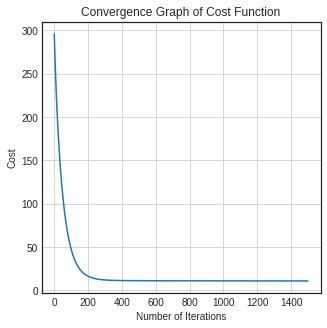

In [ ]:
n_iters = 1500
learning_rate = 0.01
initial_cost = compute_cost(X_train_norm, y_train, params)
print("Initial cost is: ", initial_cost, "\n")
(J_history, optimal_params, _) = gradient_descent(X_train_norm, y_train, params, learning_rate, n_iters)
print("Optimal parameters are: \n", optimal_params, "\n")
print("Final cost is: ", J_history[-1])
plt.figure(figsize=(5, 5))  
plt.plot(range(len(J_history)), J_history)
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [ ]:
# Predict new values
def predict(X, mu, sigma, params):
        n_samples = np.size(X, 0)
        X_norm = (X-mu) / sigma
        y = np.dot(np.hstack((np.ones((n_samples, 1)), X_norm)), params)
        return y

In [ ]:
# Predicted prices
y_test_pred = predict(X_test, mu, sigma, optimal_params)

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

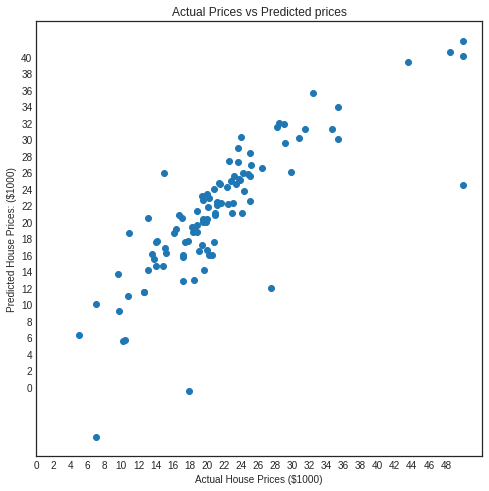

In [ ]:
plt.figure(figsize=(8, 8))  
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test_pred)),2))
plt.title("Actual Prices vs Predicted prices")

# **Performance evaluation**

To evaluate the performance of our linear model, we define the following score:

\begin{equation}
Score = 1 - \frac{\sum_{i=1}^q (y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^q (y^{(i)}-\overline{y}^{(i)})^2} ~~~~~~~~~~~~~~~~~~~(8)
\end{equation}

We also compare our model to the *Scikit-learn* linear regressor.

In [ ]:
def score(y, y_pred):
  score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())
  return score

In [ ]:
# Sklearn linear regressor
sklearn_regressor = LinearRegression().fit(X_train, y_train)
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

# Prediction for training set
y_train_pred = np.dot(X_train_norm, optimal_params)
train_accuracy = score(y_train, y_train_pred)

test_accuracy = score(y_test[:,np.newaxis], y_test_pred)
print("Training accuracy   Our model -> %f\tSklearn's implementation -> %f" % (train_accuracy,sklearn_train_accuracy))
print("Test accuracy       Our model -> %f\tSklearn's implementation -> %f" % (test_accuracy,sklearn_test_accuracy))

Training accuracy   Our model -> 0.749784	Sklearn's implementation -> 0.750886
Test accuracy       Our model -> 0.660219	Sklearn's implementation -> 0.668759


# Additional 1
Try out different learning rates to converge quickly. Choose different values of the learning rate on a log-scale.

# Additional 2

Linear regression problems can also be solved (in one step) in closed-form using the following formula:

$w = (X^T X)^{-1}X^Ty$.

Such formula does not require any feature scaling.